In [96]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

plt.style.use('seaborn')

ModuleNotFoundError: No module named 'seaborn'

In [70]:
dane = pd.read_csv("vgsales.csv", parse_dates=['Year'])
dane

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [71]:
dane = dane.dropna() #usuwam wszytkie NaN
dane = dane.drop_duplicates() #usuwam ewentualnie występujące duplikaty
dane

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [72]:
dane.drop(columns = 'Rank', inplace = True)
#wyżej usuwam kolumnę "Rank", ponieważ stanowi jedynie kopię indeksowania wierszów, jest efektem sortowania zbioru pod względem sprzedaży globalnej i raczej nie będziemy jej używać
dane

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [73]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16289 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16289 non-null  object 
 1   Platform      16289 non-null  object 
 2   Year          16289 non-null  object 
 3   Genre         16289 non-null  object 
 4   Publisher     16289 non-null  object 
 5   NA_Sales      16289 non-null  float64
 6   EU_Sales      16289 non-null  float64
 7   JP_Sales      16289 non-null  float64
 8   Other_Sales   16289 non-null  float64
 9   Global_Sales  16289 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.4+ MB


In [74]:
dane['Year'] = dane['Year'].astype(int)
dane['Platform'] = dane['Platform'].astype('category')
dane['Genre'] = dane['Genre'].astype('category')
dane['Publisher'] = dane['Publisher'].astype('category')
dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16289 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16289 non-null  object  
 1   Platform      16289 non-null  category
 2   Year          16289 non-null  int32   
 3   Genre         16289 non-null  category
 4   Publisher     16289 non-null  category
 5   NA_Sales      16289 non-null  float64 
 6   EU_Sales      16289 non-null  float64 
 7   JP_Sales      16289 non-null  float64 
 8   Other_Sales   16289 non-null  float64 
 9   Global_Sales  16289 non-null  float64 
dtypes: category(3), float64(5), int32(1), object(1)
memory usage: 1.0+ MB


In [75]:
dane['Platform'].unique()

['Wii', 'NES', 'GB', 'DS', 'X360', ..., 'NG', 'TG16', '3DO', 'GG', 'PCFX']
Length: 31
Categories (31, object): ['Wii', 'NES', 'GB', 'DS', ..., 'TG16', '3DO', 'GG', 'PCFX']

In [76]:
dane['Genre'].unique()

['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', ..., 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']
Length: 12
Categories (12, object): ['Sports', 'Platform', 'Racing', 'Role-Playing', ..., 'Action', 'Fighting', 'Adventure', 'Strategy']

In [77]:
dane['Publisher'].unique()

['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 'Sony Computer Entertainment', 'Activision', ..., 'Inti Creates', 'Takuyo', 'Interchannel-Holon', 'Rain Games', 'UIG Entertainment']
Length: 576
Categories (576, object): ['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 'Sony Computer Entertainment', ..., 'Takuyo', 'Interchannel-Holon', 'Rain Games', 'UIG Entertainment']

In [78]:
for platform_cat in dane['Platform'].cat.categories:
    counter = 0
    for game_platform in dane['Platform']:
        if platform_cat == game_platform:
            counter += 1
    print(platform_cat,':',counter)

2600 : 116
3DO : 3
3DS : 499
DC : 52
DS : 2131
GB : 97
GBA : 786
GC : 542
GEN : 27
GG : 1
N64 : 316
NES : 98
NG : 12
PC : 938
PCFX : 1
PS : 1189
PS2 : 2127
PS3 : 1303
PS4 : 336
PSP : 1196
PSV : 410
SAT : 173
SCD : 6
SNES : 239
TG16 : 2
WS : 6
Wii : 1290
WiiU : 143
X360 : 1234
XB : 803
XOne : 213


In [79]:
dane.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16289.000000,16289.000000,16289.000000,16289.000000,16289.000000,16289.000000
mean,2006.405304,0.264763,0.147035,0.078862,0.048432,0.540969
std,5.832700,0.822388,0.509101,0.311901,0.190094,1.567432
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [80]:
data = dane.groupby('Publisher').mean()
#data.drop(columns = 'Name', inplace = True)
data[data.JP_Sales>0.5]

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,
Enix Corporation,1997.60000,0.025333,0.010333,1.080000,0.009000,1.124667
Nintendo,2003.83046,1.171394,0.597773,0.653721,0.136767,2.563836
Quest,1995.00000,0.000000,0.000000,0.710000,0.000000,0.710000
SquareSoft,1996.50000,0.212692,0.095192,0.771731,0.029615,1.108654
"mixi, Inc",2015.00000,0.000000,0.000000,0.860000,0.000000,0.860000


In [81]:
dane['EU_Sales'].mean()

0.14703480876665234

In [82]:
dane['EU_Sales'].median()

0.02

In [83]:
dane.mode()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Need for Speed: Most Wanted,DS,2009,Action,Electronic Arts,0.0,0.0,0.0,0.0,0.02


In [84]:
dane.mad() #odchylenie przeciętne

Year            4.507636
NA_Sales        0.309325
EU_Sales        0.190828
JP_Sales        0.116920
Other_Sales     0.061809
Global_Sales    0.595335
dtype: float64

In [85]:
dane.var() #wariancja

Year            34.020394
NA_Sales         0.676322
EU_Sales         0.259183
JP_Sales         0.097282
Other_Sales      0.036136
Global_Sales     2.456842
dtype: float64

In [86]:
dane.std() #odchylenie standardowe

Year            5.832700
NA_Sales        0.822388
EU_Sales        0.509101
JP_Sales        0.311901
Other_Sales     0.190094
Global_Sales    1.567432
dtype: float64

In [87]:
dane.quantile(0.25) #1 kwartyl

Year            2003.00
NA_Sales           0.00
EU_Sales           0.00
JP_Sales           0.00
Other_Sales        0.00
Global_Sales       0.06
Name: 0.25, dtype: float64

In [88]:
dane.quantile(0.75) #3 kwartyl

Year            2010.00
NA_Sales           0.24
EU_Sales           0.11
JP_Sales           0.04
Other_Sales        0.04
Global_Sales       0.48
Name: 0.75, dtype: float64

In [89]:
dane.skew()

Year            -1.003365
NA_Sales        18.749008
EU_Sales        18.802380
JP_Sales        11.122988
Other_Sales     24.101327
Global_Sales    17.303441
dtype: float64

In [90]:
dane.kurtosis()

Year               1.844839
NA_Sales         643.206999
EU_Sales         747.817232
JP_Sales         191.175164
Other_Sales     1011.863537
Global_Sales     595.942336
dtype: float64

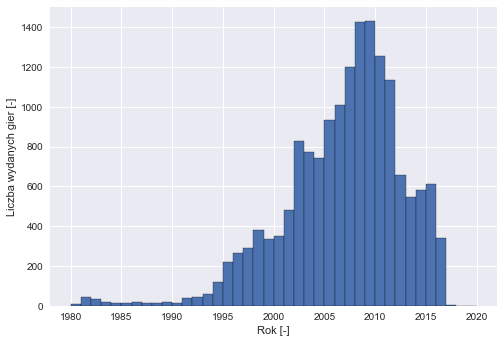

In [152]:
plt.hist(dane.Year, bins=40, edgecolor='black')
#plt.title('Liczba wydanych gier w poszczególnych latach')
plt.xlabel('Rok [-]')
plt.ylabel('Liczba wydanych gier [-]')
plt.show()

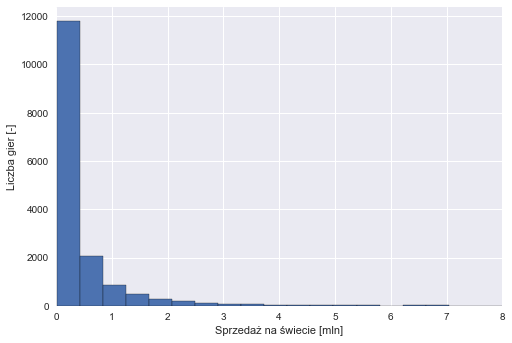

In [156]:
plt.hist(dane.Global_Sales, bins=200, edgecolor='black')
#plt.title('Liczba gier sprzedanych na świecie')
plt.xlim([0,8])
plt.xlabel('Sprzedaż na świecie [mln]')
plt.ylabel('Liczba gier [-]')
plt.show()

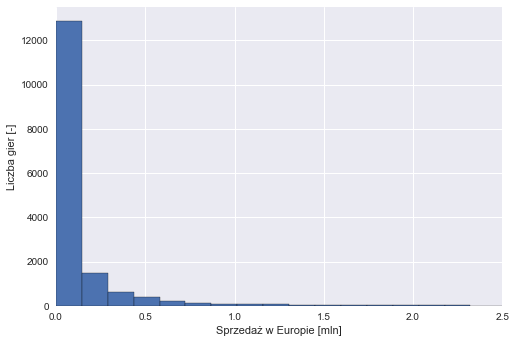

In [161]:
plt.hist(dane.EU_Sales, bins=200, edgecolor='black')
#plt.title('Liczba gier sprzedanych w Europie')
plt.xlim([0,2.5])
plt.xlabel('Sprzedaż w Europie [mln]')
plt.ylabel('Liczba gier [-]')
plt.show()